# Corona Virus - Are the Measures Effective?

- Automatic analysis of data from the Johns-Hopkins university https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html
- Download daily updates from the Github account.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import date
import urllib.request

# define list of countries
countries = ['Germany', 'Italy','US','Spain','China']

# download data
link_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
link_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
link_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# save data to local comma separated files
try:
    urllib.request.urlretrieve(link_confirmed, 'covid_19_confirmed.csv')
    urllib.request.urlretrieve(link_deaths,    'covid_19_deaths.csv')
    urllib.request.urlretrieve(link_recovered, 'covid_19_recovered.csv')
except:
    print('An error occured during download of data')
else:
    print('Confirmed cases, deaths, and recovered cases downloaded.')

Confirmed cases, deaths, and recovered cases downloaded.


In [9]:
# load local data
df_confirmed = pd.read_csv('covid_19_confirmed.csv')
df_deaths = pd.read_csv('covid_19_deaths.csv')
df_recovered = pd.read_csv('covid_19_recovered.csv')

# drop longitude and latitude, group by countries and sum-up all cases 
df_confirmed_gr = df_confirmed.drop(columns=['Lat','Long']).groupby(by='Country/Region').sum()
df_deaths_gr = df_deaths.drop(columns=['Lat','Long']).groupby(by='Country/Region').sum()
df_recovered_gr = df_recovered.drop(columns=['Lat','Long']).groupby(by='Country/Region').sum()

# filter countries
df_confirmed_gr = df_confirmed_gr[df_confirmed_gr.index.isin(countries)].T
df_confirmed_gr.index = pd.to_datetime(df_confirmed_gr.index)

df_deaths_gr = df_deaths_gr[df_deaths_gr.index.isin(countries)].T
df_deaths_gr.index = pd.to_datetime(df_deaths_gr.index)

df_recovered_gr = df_recovered_gr[df_recovered_gr.index.isin(countries)].T
df_recovered_gr.index = pd.to_datetime(df_recovered_gr.index)

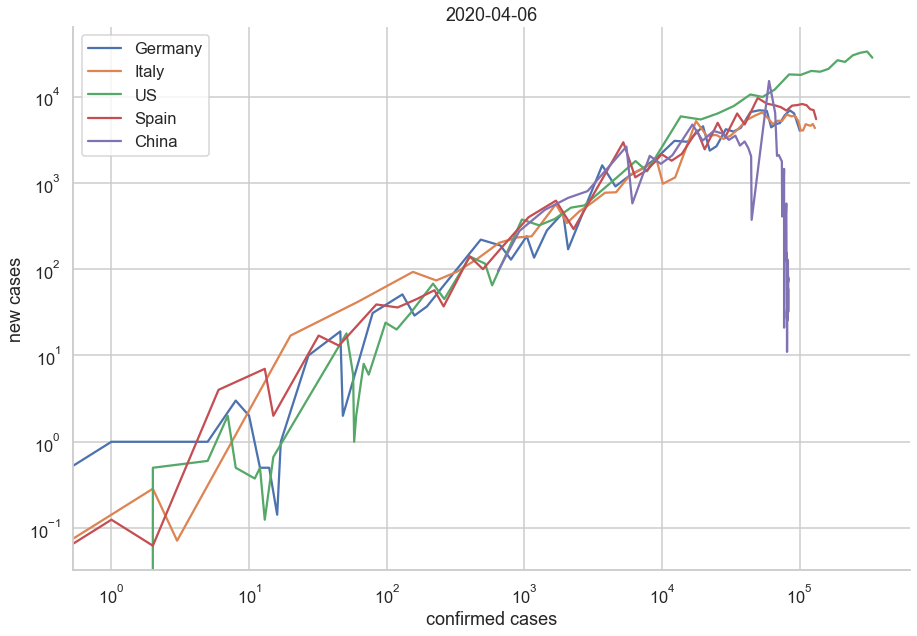

In [22]:
sns.set(context='talk',
        style='whitegrid'
       )

fig = plt.figure(figsize=(15,10))

for country in countries:

    df_confirmed_gr['New ' + country] = df_confirmed_gr[country].diff()

    x=df_confirmed_gr[country]
    y=df_confirmed_gr['New ' + country]

    g = sns.lineplot(x = x, y=y,label=country, ci=None) # ci=None avoids false error bars

g.set(xlabel="confirmed cases")
g.set(ylabel="new cases")

g.set(title=str(date.today()))
g.set(xscale="log")
g.set(yscale="log")

sns.despine()

fig.savefig("new_vs_confirmed_cases.png")

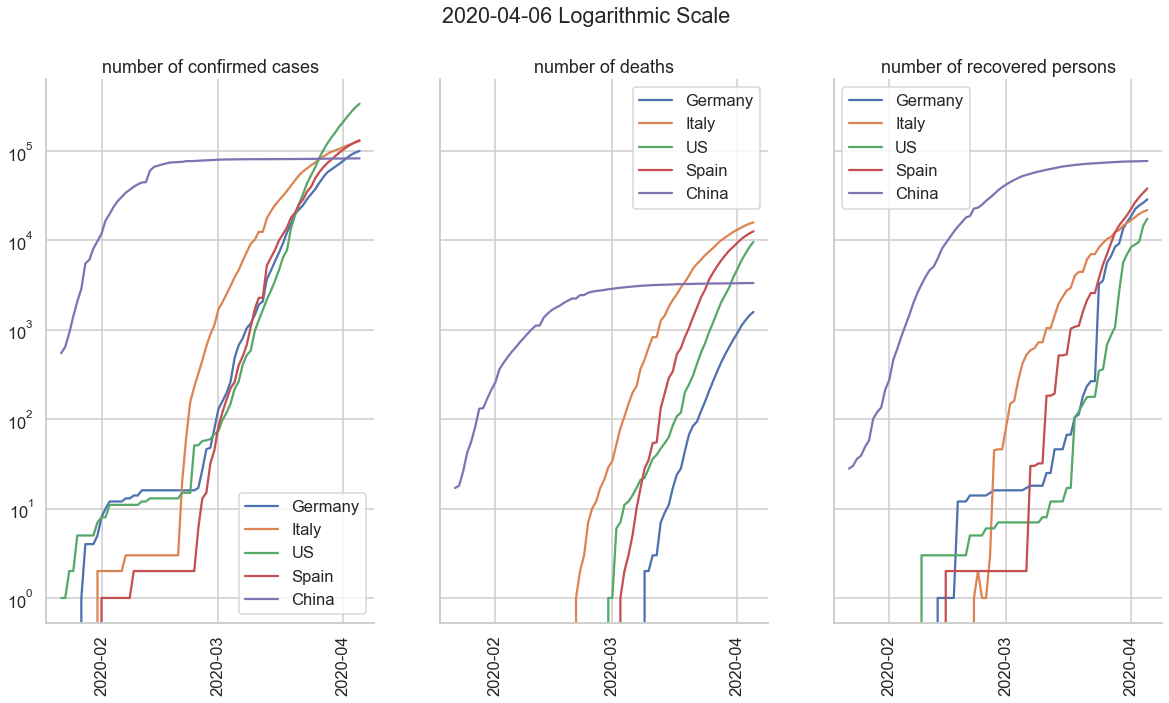

In [11]:
sns.set(context='talk',
        style='whitegrid'
       )

fig,axs = plt.subplots(1,3,figsize=(20,10),sharex='col',sharey=True)

for country in countries:
    g = sns.lineplot(data=df_confirmed_gr[country],label=country,ax=axs[0])
    g = sns.lineplot(data=df_deaths_gr[country],label=country,ax=axs[1])
    g = sns.lineplot(data=df_recovered_gr[country],label=country,ax=axs[2])

# rotate xlabels
for ax in fig.axes:
    plt.sca(ax) # set active axis
    plt.xticks(rotation=90)

axs[0].set(yscale="log")
axs[1].set(yscale="log")
axs[2].set(yscale="log")

# Make ticks on occurrences of each month:
axs[0].xaxis.set_major_locator(mdates.MonthLocator())    
axs[1].xaxis.set_major_locator(mdates.MonthLocator())   
axs[2].xaxis.set_major_locator(mdates.MonthLocator())   
    
axs[0].set_title('number of confirmed cases')    
axs[1].set_title('number of deaths')
axs[2].set_title('number of recovered persons')
fig.suptitle(str(date.today()) + ' Logarithmic Scale')

sns.despine()

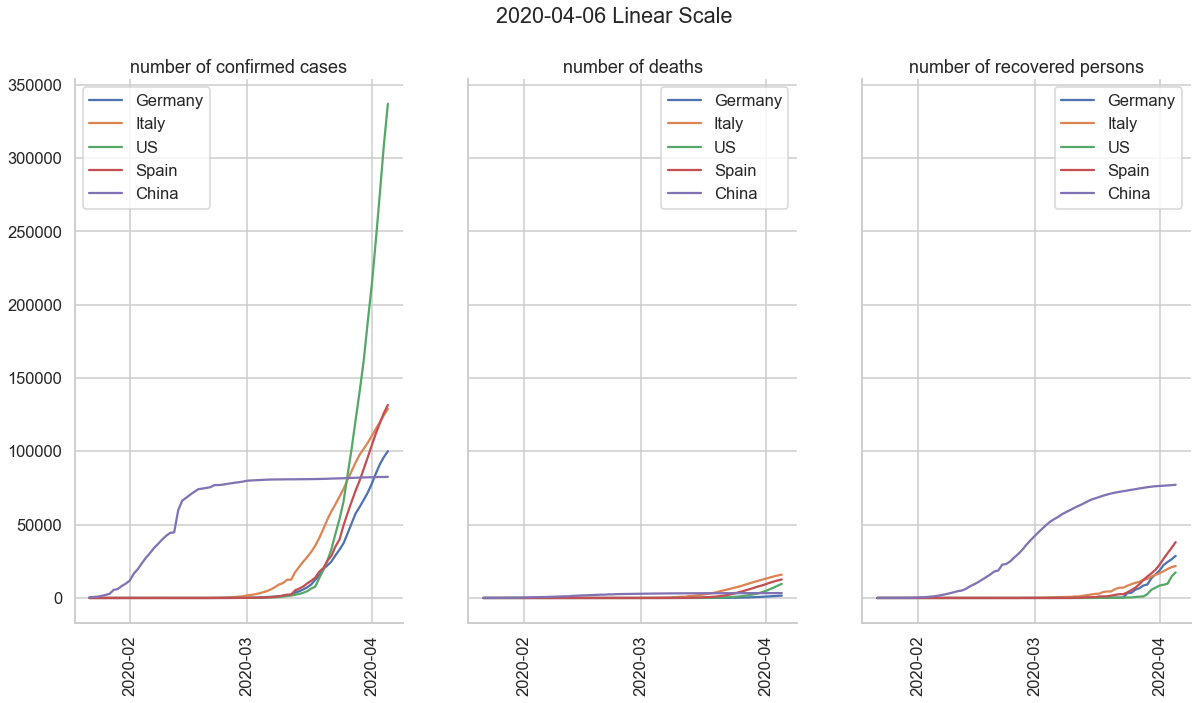

In [12]:
# second figure, linear scale

sns.set(context='talk',
        style='whitegrid'
       )

fig,axs = plt.subplots(1,3,figsize=(20,10),sharex='col',sharey=True)

for country in countries:
    g = sns.lineplot(data=df_confirmed_gr[country],label=country,ax=axs[0])
    g = sns.lineplot(data=df_deaths_gr[country],label=country,ax=axs[1])
    g = sns.lineplot(data=df_recovered_gr[country],label=country,ax=axs[2])

# rotate xlabels
for ax in fig.axes:
    plt.sca(ax) # set active axis
    plt.xticks(rotation=90)

# Make ticks on occurrences of each month:
axs[0].xaxis.set_major_locator(mdates.MonthLocator())    
axs[1].xaxis.set_major_locator(mdates.MonthLocator())   
axs[2].xaxis.set_major_locator(mdates.MonthLocator())     
    
    
axs[0].set_title('number of confirmed cases')    
axs[1].set_title('number of deaths')
axs[2].set_title('number of recovered persons')
fig.suptitle(str(date.today()) + ' Linear Scale')

sns.despine()       

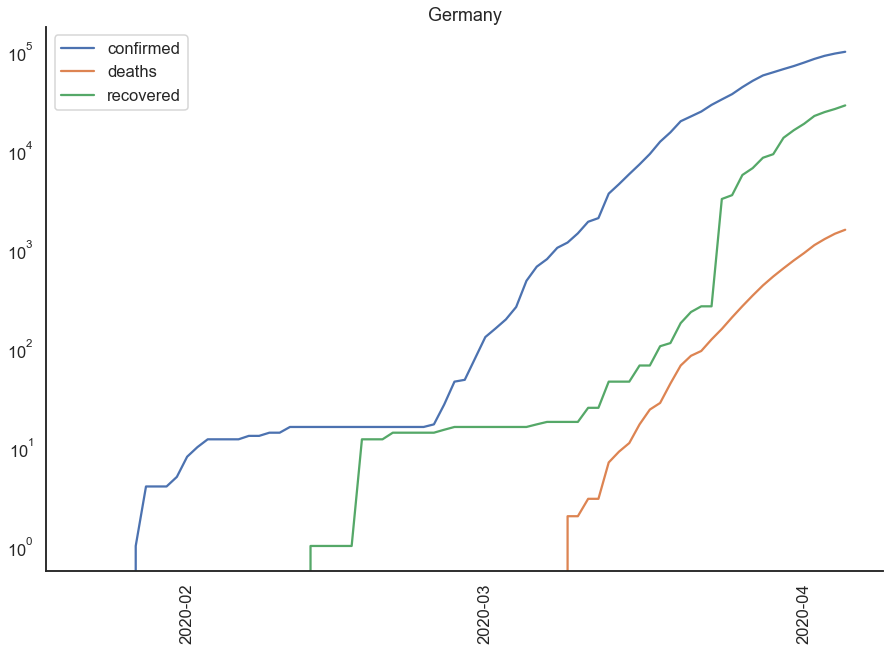

In [14]:
country = 'Germany'

sns.set(context='talk',
        style='white'
       )

fig = plt.figure(figsize=(15,10))

g = sns.lineplot(data=df_confirmed_gr[country],label='confirmed')

g = sns.lineplot(data=df_deaths_gr[country],label='deaths')
g = sns.lineplot(data=df_recovered_gr[country],label='recovered')

g.set(yscale="log")

# Make ticks on occurrences of each month:
g.xaxis.set_major_locator(mdates.MonthLocator())    

plt.title(country)

plt.xticks(rotation=90)

sns.despine()